In [1]:
%load_ext autoreload
%autoreload 2

Goal :

- New column → sucess/fail ratio → which articles have high success, high failure. 
- color gradient based on success, failure. 
- Correlation categories, successes failures. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from itertools import chain
from collections import Counter

from src.data.some_dataloader import *

In this notebook we will: 
- find how often each article is used in the Wikispeedia game (i.e. how many times each article was clicked on)
- find articles that are most/least used 
- link each article to its category 
- find most used categories

# Import data 

In [3]:
articles = load_articles_dataframe()
categories = load_categories_dataframe()
finished_paths = load_path_finished_dataframe()
unfinished_paths = load_path_unfinished_distance_dataframe()

In [4]:
articles

,articles
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in
1,%C3%85land
2,%C3%89douard_Manet
3,%C3%89ire
4,%C3%93engus_I_of_the_Picts
...,...
4599,Zionism
4600,Zirconium
4601,Zoroaster
4602,Zuid-Gelders


In [5]:
categories

,articles,category
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.History.British_History.British_Histor...
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,subject.People.Historical_figures
2,%C3%85land,subject.Countries
3,%C3%85land,subject.Geography.European_Geography.European_...
4,%C3%89douard_Manet,subject.People.Artists
...,...,...
5199,Zirconium,subject.Science.Chemistry.Chemical_elements
5200,Zoroaster,subject.People.Religious_figures_and_leaders
5201,Zuid-Gelders,subject.Geography.European_Geography
5202,Zuid-Gelders,subject.Language_and_literature.Languages


In [6]:
finished_paths

,hashedIpAddress,timestamp,durationInSec,path,rating
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN
3,64dd5cd342e3780c,1265613925,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN
4,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0
...,...,...,...,...,...
51313,15a13a1d66ef5456,1349231015,66,Yagan;Ancient_Egypt;Civilization,NaN
51314,2ef7ac844cefda58,1300254138,165,Yagan;Folklore;Brothers_Grimm;<;19th_century;C...,3.0
51315,12863abb7887f890,1385095372,228,Yagan;Australia;England;France;United_States;T...,NaN
51316,19f8284371753362,1298792567,56,Yarralumla%2C_Australian_Capital_Territory;Aus...,1.0


In [7]:
unfinished_paths

,hashedIpAddress,timestamp,durationInSec,path,target,type
0,2426091a53125110,1297054935,1804,Obi-Wan_Kenobi,Microsoft,timeout
1,26141fd878806294,1297055651,1805,Julius_Caesar,Caracas,timeout
2,2b015fb8181c48f2,1297090819,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout
3,53a53bc244e08a6a,1297094761,49,Paraguay,Mount_St._Helens,restart
4,53a53bc244e08a6a,1297099105,1808,Paraguay;Bolivia,Mount_St._Helens,timeout
...,...,...,...,...,...,...
24870,109ed71f571d86e9,1389787605,180,Franz_Kafka;Tuberculosis;World_Health_Organiza...,Cholera,restart
24871,232f992e57d43e8d,1389787697,6,Modern_history,Hollandic,restart
24872,2e09a7224600a7cd,1389798400,1900,Computer_programming;Linguistics;Culture;Popul...,The_Beatles,timeout
24873,60af9e2138051b96,1389799481,1903,Jamaica;United_Kingdom;World_War_II;Battle_of_...,Alan_Turing,timeout


# Usage of articles

In [8]:
paths = pd.concat([finished_paths["path"], unfinished_paths["path"]])

paths_merged = paths.apply(lambda row: row.split(';'))

clicks_list = paths_merged.values.flatten().tolist()
clicks_list = list(chain.from_iterable(clicks_list))

print(f'there are {len(clicks_list)} clicks in the whole whikispeedia dataset (both finished and unfinished paths)')

there are 476073 clicks in the whole whikispeedia dataset (both finished and unfinished paths)


In [9]:
article_list = list(articles['articles'])

# count number of occurences of each article
counts = Counter(clicks_list)
occurences = {item: counts[item] for item in article_list}

df_articles_count = pd.DataFrame(list(occurences.items()), columns = ['articles', 'click_count']).set_index('articles') # df containing the click counts for each article
df_articles_count.index.name = None
df_articles_count

,click_count
%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,0
%C3%85land,4
%C3%89douard_Manet,7
%C3%89ire,13
%C3%93engus_I_of_the_Picts,0
...,...
Zionism,27
Zirconium,34
Zoroaster,20
Zuid-Gelders,10


### Compute success/failure ratio

success_ratio = $\frac{Succesful Clicks}{Total Clicks}$ 

failre_ratio = $\frac{Failure Clicks}{Total Clicks}$ 


In [10]:
# extract articles from the finished paths and put them in a list as new column
finished_paths['articles'] = {} 
finished_paths['articles'] = finished_paths['path'].astype(str).str.split(';')
finished_paths
        

,hashedIpAddress,timestamp,durationInSec,path,rating,articles
0,6a3701d319fc3754,1297740409,166,14th_century;15th_century;16th_century;Pacific...,NaN,"[14th_century, 15th_century, 16th_century, Pac..."
1,3824310e536af032,1344753412,88,14th_century;Europe;Africa;Atlantic_slave_trad...,3.0,"[14th_century, Europe, Africa, Atlantic_slave_..."
2,415612e93584d30e,1349298640,138,14th_century;Niger;Nigeria;British_Empire;Slav...,NaN,"[14th_century, Niger, Nigeria, British_Empire,..."
3,64dd5cd342e3780c,1265613925,37,14th_century;Renaissance;Ancient_Greece;Greece,NaN,"[14th_century, Renaissance, Ancient_Greece, Gr..."
4,015245d773376aab,1366730828,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,3.0,"[14th_century, Italy, Roman_Catholic_Church, H..."
...,...,...,...,...,...,...
51313,15a13a1d66ef5456,1349231015,66,Yagan;Ancient_Egypt;Civilization,NaN,"[Yagan, Ancient_Egypt, Civilization]"
51314,2ef7ac844cefda58,1300254138,165,Yagan;Folklore;Brothers_Grimm;<;19th_century;C...,3.0,"[Yagan, Folklore, Brothers_Grimm, <, 19th_cent..."
51315,12863abb7887f890,1385095372,228,Yagan;Australia;England;France;United_States;T...,NaN,"[Yagan, Australia, England, France, United_Sta..."
51316,19f8284371753362,1298792567,56,Yarralumla%2C_Australian_Capital_Territory;Aus...,1.0,"[Yarralumla%2C_Australian_Capital_Territory, A..."


In [11]:
# do the same for the unfinished paths
unfinished_paths['articles'] = {}
unfinished_paths['articles'] = unfinished_paths['path'].astype(str).str.split(';')
unfinished_paths

,hashedIpAddress,timestamp,durationInSec,path,target,type,articles
0,2426091a53125110,1297054935,1804,Obi-Wan_Kenobi,Microsoft,timeout,[Obi-Wan_Kenobi]
1,26141fd878806294,1297055651,1805,Julius_Caesar,Caracas,timeout,[Julius_Caesar]
2,2b015fb8181c48f2,1297090819,1818,Malawi;Democracy;Alexander_the_Great,First_Crusade,timeout,"[Malawi, Democracy, Alexander_the_Great]"
3,53a53bc244e08a6a,1297094761,49,Paraguay,Mount_St._Helens,restart,[Paraguay]
4,53a53bc244e08a6a,1297099105,1808,Paraguay;Bolivia,Mount_St._Helens,timeout,"[Paraguay, Bolivia]"
...,...,...,...,...,...,...,...
24870,109ed71f571d86e9,1389787605,180,Franz_Kafka;Tuberculosis;World_Health_Organiza...,Cholera,restart,"[Franz_Kafka, Tuberculosis, World_Health_Organ..."
24871,232f992e57d43e8d,1389787697,6,Modern_history,Hollandic,restart,[Modern_history]
24872,2e09a7224600a7cd,1389798400,1900,Computer_programming;Linguistics;Culture;Popul...,The_Beatles,timeout,"[Computer_programming, Linguistics, Culture, P..."
24873,60af9e2138051b96,1389799481,1903,Jamaica;United_Kingdom;World_War_II;Battle_of_...,Alan_Turing,timeout,"[Jamaica, United_Kingdom, World_War_II, Battle..."


In [12]:
from collections import Counter

# flatten list of articles from all paths into a single list
all_articles = [article for sublist in finished_paths['articles'] for article in sublist]

article_counts = Counter(all_articles)

article_counts_df = pd.DataFrame(article_counts.items(), columns=['article', 'count']).sort_values(by='count', ascending=False).reset_index(drop=True)

article_counts_df


,article,count
0,<,20561
1,United_States,8896
2,Europe,4362
3,United_Kingdom,3904
4,England,3332
...,...,...
4165,Introduction_to_special_relativity,1
4166,Six-party_talks_concerning_North_Korea%27s_nuc...,1
4167,Anton%C3%ADn_Dvo%C5%99%C3%A1k,1
4168,Colditz_Castle,1


#### Considering all clicks 

In [13]:
all_articles = [article for sublist in finished_paths['articles'] for article in sublist]
total_counts = Counter(all_articles)

successful_articles = [
    article for sublist in finished_paths['articles'] for article in sublist
]
successful_counts = Counter(successful_articles)


article_data_s = [
    {
        'article': article,
        'click_count': total_counts[article],
        'success_count': successful_counts[article],
        'success_ratio': successful_counts[article] / total_counts[article]
    }
    for article in total_counts
]

success_ratios_df = pd.DataFrame(article_data_s).sort_values(by='click_count', ascending=False).reset_index(drop=True)
success_ratios_df


,article,click_count,success_count,success_ratio
0,<,20561,20561,1.0
1,United_States,8896,8896,1.0
2,Europe,4362,4362,1.0
3,United_Kingdom,3904,3904,1.0
4,England,3332,3332,1.0
...,...,...,...,...
4165,Introduction_to_special_relativity,1,1,1.0
4166,Six-party_talks_concerning_North_Korea%27s_nuc...,1,1,1.0
4167,Anton%C3%ADn_Dvo%C5%99%C3%A1k,1,1,1.0
4168,Colditz_Castle,1,1,1.0


#### Getting Unique Clicks in paths.

If player passes 3 times by 'England' article, it should only be counted once in the successful/uns

In [14]:
def get_unique_counts(paths):
    unique_counts = Counter()
    for path_articles in paths['articles']:
        unique_articles = set(path_articles)
        unique_counts.update(unique_articles)
    return unique_counts


successful_unique_counts = get_unique_counts(finished_paths[finished_paths['rating'].notna()])

# calculate differences for successful paths
article_data_s_unique = [
    {
        'article': article,
        'total_click_count': total_counts[article],
        'unique_success_count': successful_unique_counts[article],
        'duplicates_in_success': total_counts[article] - successful_unique_counts[article]
    }
    for article in total_counts
]

success_duplicates_df = pd.DataFrame(article_data_s_unique).sort_values(by='total_click_count', ascending=False)
success_duplicates_df


,article,total_click_count,unique_success_count,duplicates_in_success
39,<,20561,4935,15626
24,United_States,8896,4786,4110
9,Europe,4362,2333,2029
303,United_Kingdom,3904,2189,1715
85,England,3332,1746,1586
...,...,...,...,...
4131,Introduction_to_special_relativity,1,0,1
3756,Six-party_talks_concerning_North_Korea%27s_nuc...,1,0,1
4099,Anton%C3%ADn_Dvo%C5%99%C3%A1k,1,0,1
3775,Colditz_Castle,1,0,1


In [15]:
unsuccessful_articles = [
    article for sublist in unfinished_paths['articles'] for article in sublist
]
unsuccessful_counts = Counter(unsuccessful_articles)

article_data_f = [
    {
        'article': article,
        'click_count': total_counts[article],
        'failure_count' : unsuccessful_counts[article],
        'failure_ratio': unsuccessful_counts[article] / total_counts[article]
    }
    for article in total_counts
]

unsuccess_ratios_df = pd.DataFrame(article_data_f).sort_values(by='click_count', ascending=False).reset_index(drop=True)
unsuccess_ratios_df


,article,click_count,failure_count,failure_ratio
0,<,20561,12907,0.627742
1,United_States,8896,3553,0.399393
2,Europe,4362,1249,0.286337
3,United_Kingdom,3904,1424,0.364754
4,England,3332,1226,0.367947
...,...,...,...,...
4165,Introduction_to_special_relativity,1,0,0.000000
4166,Six-party_talks_concerning_North_Korea%27s_nuc...,1,0,0.000000
4167,Anton%C3%ADn_Dvo%C5%99%C3%A1k,1,5,5.000000
4168,Colditz_Castle,1,0,0.000000


In [16]:
all_paths = pd.concat([finished_paths["path"], unfinished_paths["path"]])
all_paths_merged = all_paths.apply(lambda row: row.split(';'))

clicks_list = list(chain.from_iterable(all_paths_merged.values.tolist()))
total_click_counts = Counter(clicks_list)

def unique_click_counter(paths):
    unique_counts = Counter()
    for path in paths:
        unique_articles = set(path.split(';')) 
        unique_counts.update(unique_articles)
    return unique_counts

successful_unique_counts = unique_click_counter(finished_paths["path"])
unsuccessful_unique_counts = unique_click_counter(unfinished_paths["path"])

data = []

for article in article_list:
    total_click_count = total_click_counts[article]
    unique_success_count = successful_unique_counts[article]
    unique_failure_count = unsuccessful_unique_counts[article]
    
    # calc unique total click count (unique success + unique failure)
    unique_click_count = unique_success_count + unique_failure_count
    
    # calc ratios based on both total and unique counts
    success_ratio_total = successful_unique_counts[article] / total_click_count if total_click_count > 0 else 0
    failure_ratio_total = unsuccessful_unique_counts[article] / total_click_count if total_click_count > 0 else 0
    
    success_ratio_unique = unique_success_count / unique_click_count if unique_click_count > 0 else 0
    failure_ratio_unique = unique_failure_count / unique_click_count if unique_click_count > 0 else 0

    data.append({
        'article': article,
        'total_click_count': total_click_count,
        'unique_click_count': unique_click_count,
        'unique_success_count': unique_success_count,
        'unique_failure_count': unique_failure_count,
        'success_ratio_total': success_ratio_total,
        'failure_ratio_total': failure_ratio_total,
        'success_ratio_unique': success_ratio_unique,
        'failure_ratio_unique': failure_ratio_unique
    })


df_articles_count = pd.DataFrame(data).sort_values(by='total_click_count', ascending=False).reset_index(drop=True)
df_articles_count  

,article,total_click_count,unique_click_count,unique_success_count,unique_failure_count,success_ratio_total,failure_ratio_total,success_ratio_unique,failure_ratio_unique
0,United_States,12449,12010,8675,3335,0.696843,0.267893,0.722315,0.277685
1,Europe,5611,5497,4303,1194,0.766886,0.212796,0.782791,0.217209
2,United_Kingdom,5328,5161,3807,1354,0.714527,0.254129,0.737648,0.262352
3,England,4558,4429,3261,1168,0.715445,0.256253,0.736284,0.263716
4,Earth,4216,4144,3176,968,0.753321,0.229602,0.766409,0.233591
...,...,...,...,...,...,...,...,...,...
4599,History_of_Portugal_%281777%E2%80%931834%29,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4600,History_of_Poland_%281945%E2%80%931989%29,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4601,History_of_Northwest_Territories_capital_cities,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4602,History_of_Miami%2C_Florida,0,0,0,0,0.000000,0.000000,0.000000,0.000000


In [17]:
# add "<" manually if it is not present
if "<" not in [entry['article'] for entry in data]:
    data.append({
        'article': "<",
        'total_click_count': total_click_counts.get("<", 0),
        'unique_click_count': successful_unique_counts.get("<", 0) + unsuccessful_unique_counts.get("<", 0),
        'unique_success_count': successful_unique_counts.get("<", 0),
        'unique_failure_count': unsuccessful_unique_counts.get("<", 0),
        'success_ratio_total': successful_unique_counts.get("<", 0) / total_click_counts.get("<", 1) if total_click_counts.get("<", 1) > 0 else 0,
        'failure_ratio_total': unsuccessful_unique_counts.get("<", 0) / total_click_counts.get("<", 1) if total_click_counts.get("<", 1) > 0 else 0,
        'success_ratio_unique': successful_unique_counts.get("<", 0) / (successful_unique_counts.get("<", 0) + unsuccessful_unique_counts.get("<", 0)) if (successful_unique_counts.get("<", 0) + unsuccessful_unique_counts.get("<", 0)) > 0 else 0,
        'failure_ratio_unique': unsuccessful_unique_counts.get("<", 0) / (successful_unique_counts.get("<", 0) + unsuccessful_unique_counts.get("<", 0)) if (successful_unique_counts.get("<", 0) + unsuccessful_unique_counts.get("<", 0)) > 0 else 0
    })

In [18]:
# sort but avoid resetting index until verifying "<" is present
df_articles_count = pd.DataFrame(data).sort_values(by='total_click_count', ascending=False).reset_index()

df_articles_count

,index,article,total_click_count,unique_click_count,unique_success_count,unique_failure_count,success_ratio_total,failure_ratio_total,success_ratio_unique,failure_ratio_unique
0,4604,<,33468,14196,8995,5201,0.268764,0.155402,0.633629,0.366371
1,4297,United_States,12449,12010,8675,3335,0.696843,0.267893,0.722315,0.277685
2,1433,Europe,5611,5497,4303,1194,0.766886,0.212796,0.782791,0.217209
3,4293,United_Kingdom,5328,5161,3807,1354,0.714527,0.254129,0.737648,0.262352
4,1385,England,4558,4429,3261,1168,0.715445,0.256253,0.736284,0.263716
...,...,...,...,...,...,...,...,...,...,...
4600,558,Benjamin_of_Tudela,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4601,3241,Photovoltaic_array,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4602,557,Benjamin_Mountfort,0,0,0,0,0.000000,0.000000,0.000000,0.000000
4603,550,Bench_language,0,0,0,0,0.000000,0.000000,0.000000,0.000000


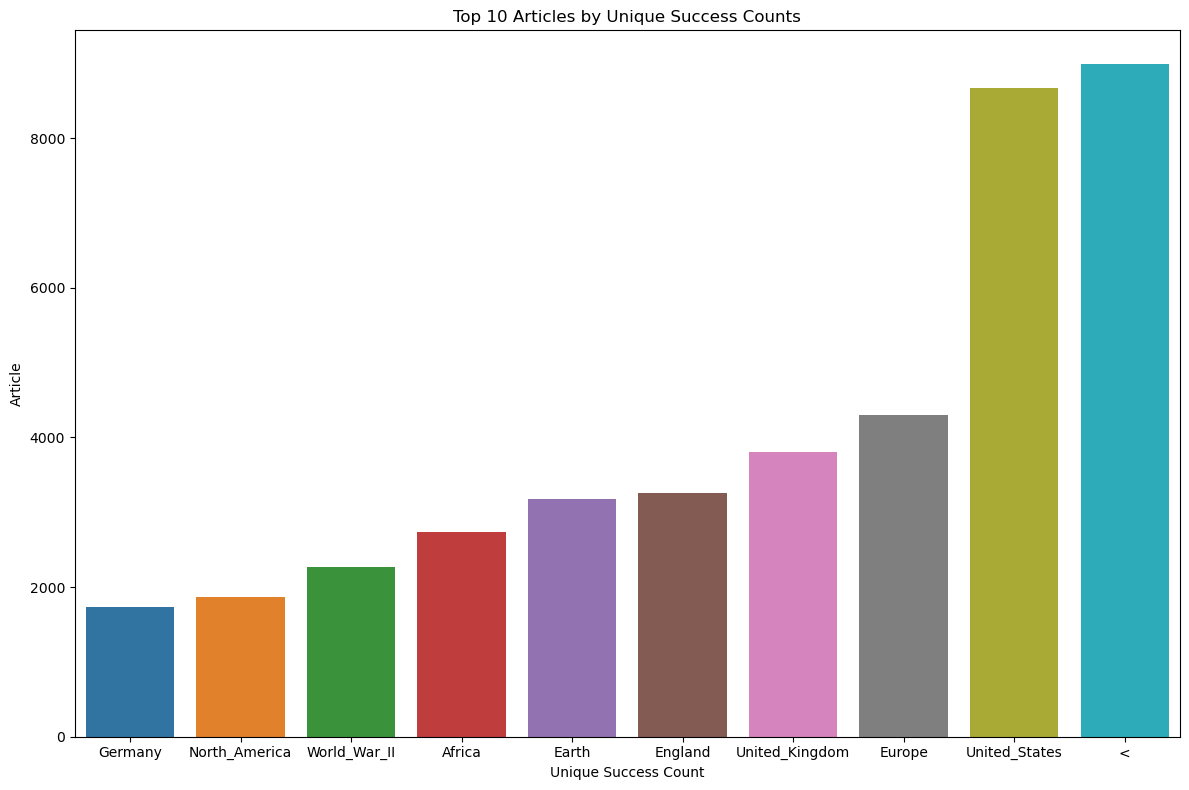

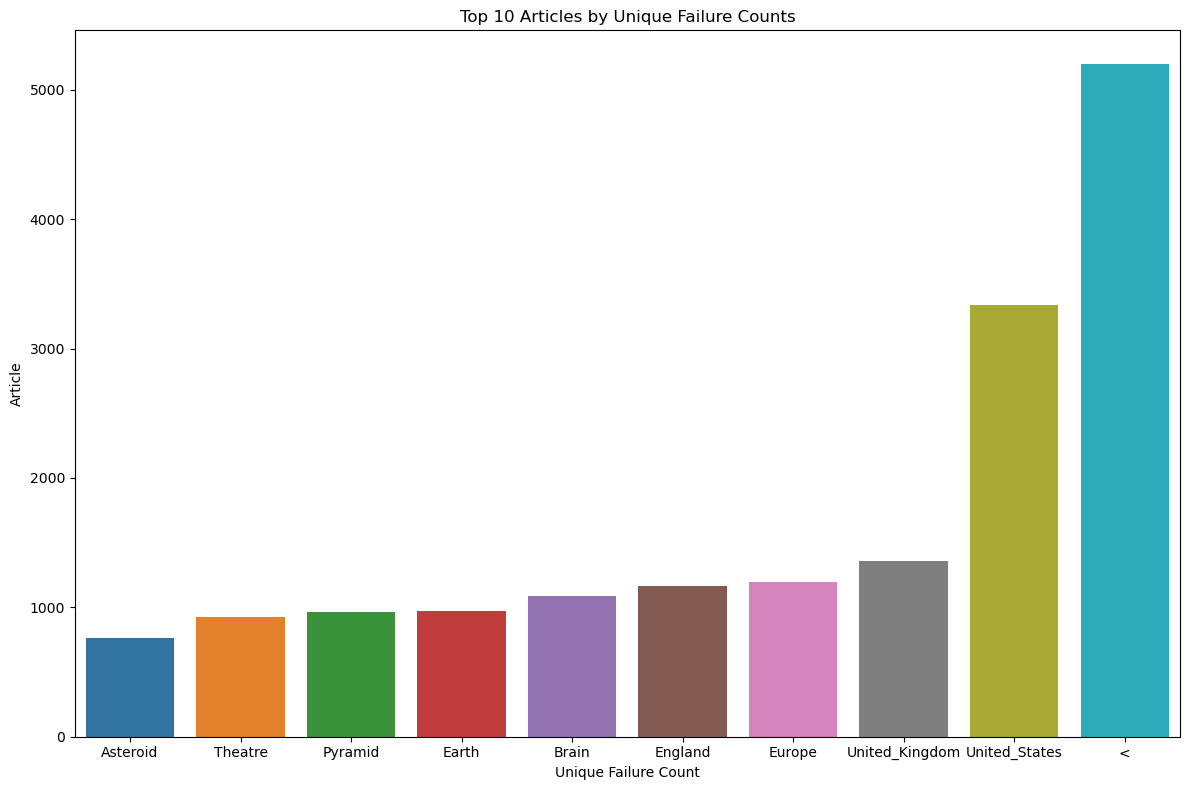

In [19]:
top_success_counts = df_articles_count.nlargest(10, 'unique_success_count')[::-1]
top_failure_counts = df_articles_count.nlargest(10, 'unique_failure_count')[::-1]

# vizzz 1: top 10 articles by success counts
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_success_counts,
    y='unique_success_count',
    x='article', 
    orient='v'
)
plt.title("Top 10 Articles by Unique Success Counts")
plt.xlabel("Unique Success Count")
plt.ylabel("Article")
plt.tight_layout()
plt.show()

# vizz 2 : top 10 articles by unique failure counts
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_failure_counts,
    y='unique_failure_count',
    x='article',
    orient='v'
)
plt.title("Top 10 Articles by Unique Failure Counts")
plt.xlabel("Unique Failure Count")
plt.ylabel("Article")
plt.tight_layout()
plt.show()


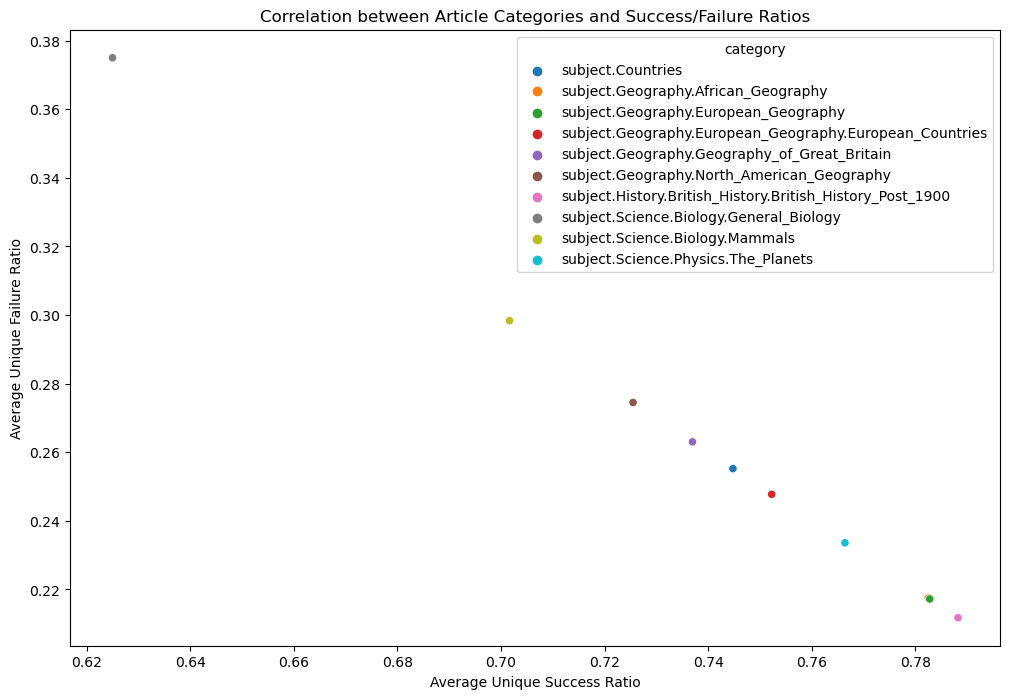

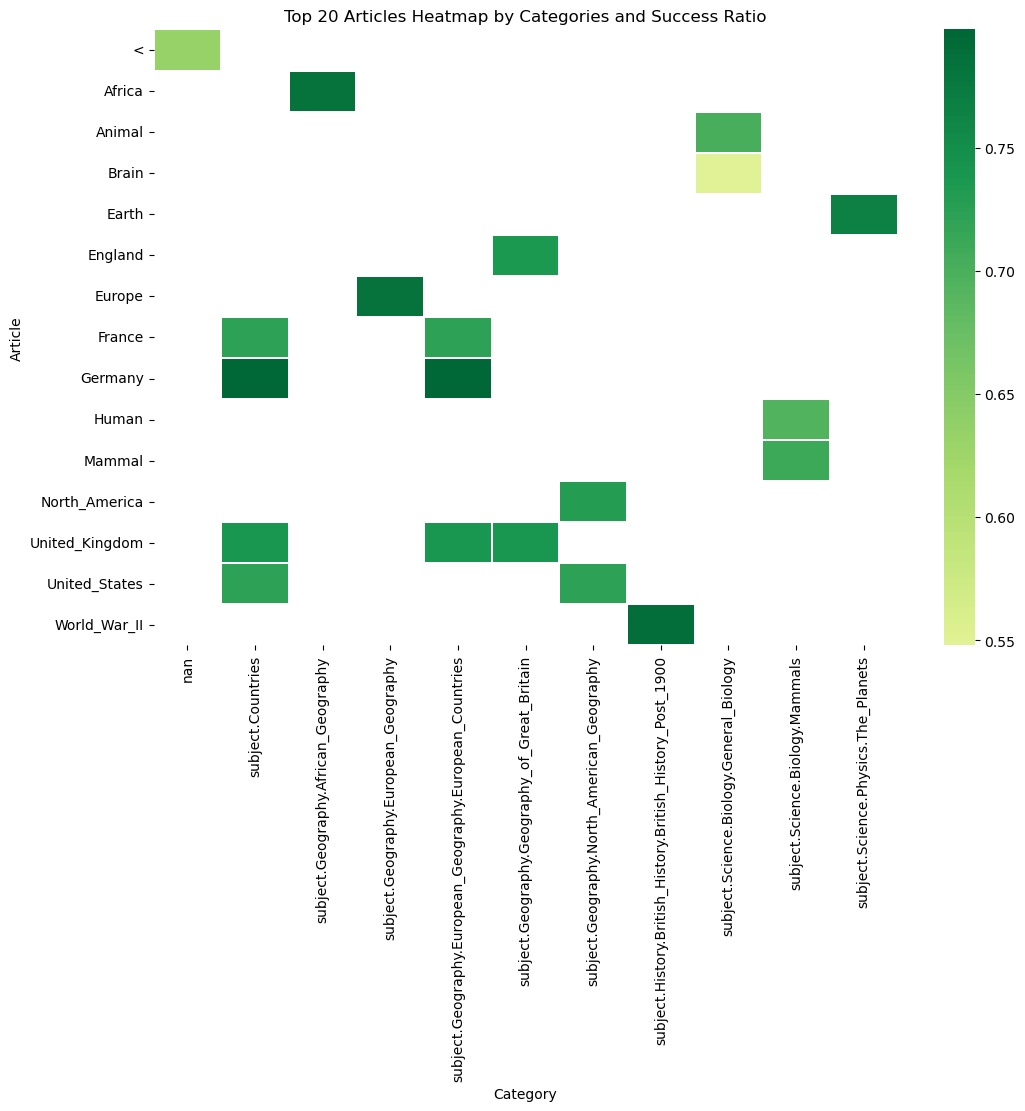

In [20]:
# keep only the top 15 most clicked articles
top_20_articles = df_articles_count.nlargest(15, 'total_click_count')
df_art_and_cat = top_20_articles.merge(categories, left_on='article', right_on='articles', how='left')

# drop extra 'articles' column resulting from the merge
df_art_and_cat = df_art_and_cat.drop(columns=['articles'])

category_grouped = df_art_and_cat.groupby('category').agg({
    'success_ratio_unique': 'mean',
    'failure_ratio_unique': 'mean'
}).reset_index()


plt.figure(figsize=(12, 8))
sns.scatterplot(data=category_grouped, x='success_ratio_unique', y='failure_ratio_unique', hue='category', legend=True)
plt.xlabel("Average Unique Success Ratio")
plt.ylabel("Average Unique Failure Ratio")
plt.title("Correlation between Article Categories and Success/Failure Ratios")
plt.show()

plt.figure(figsize=(12, 8))
heatmap_df = df_art_and_cat.pivot(index='article', columns='category', values='success_ratio_unique')
sns.heatmap(heatmap_df, cmap="RdYlGn", center=0.5, linewidths=0.1)
plt.title("Top 20 Articles Heatmap by Categories and Success Ratio")
plt.xlabel("Category")
plt.ylabel("Article")
plt.show()
